In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
def normal(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def erf(x):
    x0 = np.abs(x)
    sign = np.sign(x)
    # Approximation of the error function
    p = 0.3275911
    a1 = 0.254829592
    a2 = -0.284496736
    a3 = 1.421413741
    a4 = -1.453152027
    a5 = 1.061405429
    t = 1.0 / (1.0 + p * x0)
    return (1.0 - ((a1*t + a2*t**2 + a3*t**3 + a4*t**4 + a5*t**5) * np.exp(-x0**2)))*sign

## From Abramowitz & Stegun (1964), formula 7.1.26, Handbook of Mathematical Functions: with Formulas, Graphs, and Mathematical Tables

In [4]:
### Truncated Gaussian distribution

# The limits for the distribution are:
xmin = 60
xmax = 160

def GCDF(x):
    return 1/2 * (1 + erf(x/np.sqrt(2))) 

def TruncatedGaussianPDF(x, mu, sigma, xmin, xmax):
    xi = (x - mu) / sigma
    alpha = (xmin - mu) / sigma
    beta = (xmax - mu) / sigma
    Z = GCDF(beta) - GCDF(alpha)
    return np.exp(-xi**2/2) / (sigma * np.sqrt(2 * np.pi) * Z)

def TruncatedGaussianCDF(x, mu, sigma, xmin, xmax):
    xi = (x - mu) / sigma
    alpha = (xmin - mu) / sigma
    beta = (xmax - mu) / sigma
    Z = GCDF(beta) - GCDF(alpha)
    return GCDF(xi) - GCDF(alpha) / Z


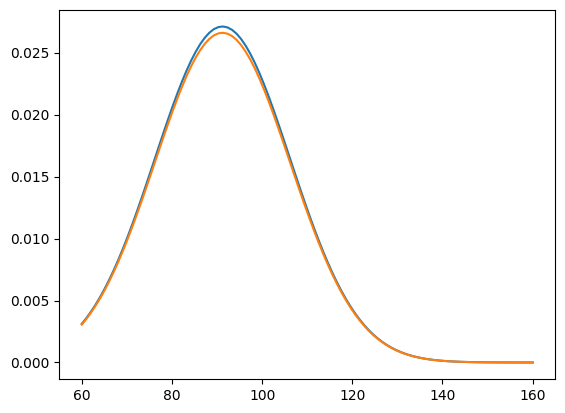

In [5]:
plt.plot(np.linspace(60, 160, 100), TruncatedGaussianPDF(np.linspace(60, 160, 100), 91.2, 15, xmin, xmax))
plt.plot(np.linspace(60, 160, 100), normal(np.linspace(60, 160, 100), 91.2, 15))

In [6]:
print(np.trapezoid(TruncatedGaussianPDF(np.linspace(60, 160, 100), 91.2, 15, xmin, xmax), np.linspace(60, 160, 100),dx=0.01))
print(np.trapezoid(normal(np.linspace(60, 160, 100), 91.2, 15), np.linspace(60, 160, 100),dx=0.01))

0.9999631845728588
0.9811989192689614


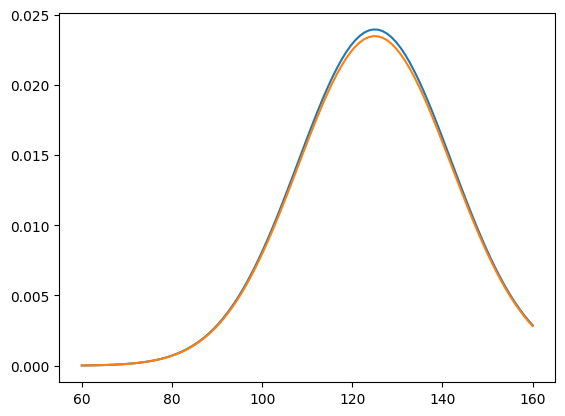

In [7]:
plt.plot(np.linspace(60, 160, 100), TruncatedGaussianPDF(np.linspace(60, 160, 100), 125, 17, xmin, xmax))
plt.plot(np.linspace(60, 160, 100), normal(np.linspace(60, 160, 100), 125, 17))

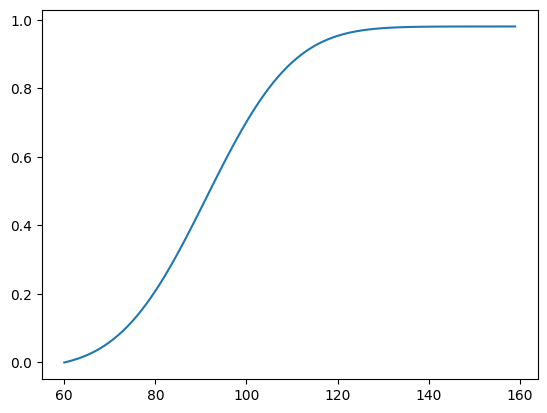

In [8]:
plt.plot(np.arange(60, 160, 1), TruncatedGaussianCDF(np.arange(60, 160, 1), 91.2, 15, xmin, xmax))

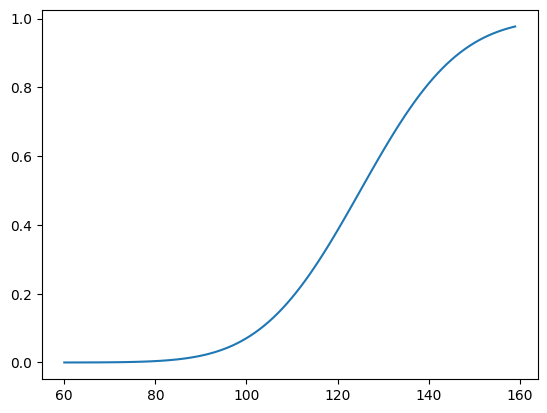

In [9]:
plt.plot(np.arange(60, 160, 1), TruncatedGaussianCDF(np.arange(60, 160, 1), 125, 17, xmin, xmax))

In [10]:
rand1 = np.random.uniform(0, 1)

def NewRaph0(g, h, p, error): # func, step, initial guess, error
    count = np.abs(g(p))
    i = 0
    while count >= error:
        p = p - (g(p)/((g(p+h)-g(p))/h))
        count = np.abs(g(p))
        i += 1
    return p # root, number of iterations

In [13]:
i = 0
sample  = np.array([])
while (i<100):
    rand1 = np.random.uniform(0, 1)
    try:
        sample = np.append(sample, NewRaph0(lambda x: TruncatedGaussianCDF(x, 91.2, 15, xmin, xmax) - rand1, 0.01, 100, 1e-6))
        i += 1
    except RuntimeWarning:
        continue

/tmp/ipykernel_19028/329049422.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  p = p - (g(p)/((g(p+h)-g(p))/h))


KeyboardInterrupt: 